In [2]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%precision 2

import logging
logging.basicConfig(level=logging.INFO)

# Set an arbitrary global seed to keep the randomly generated quantities the same
seed = 1
np.random.seed(seed)

import elfi
from elfi.examples import lorenz
from elfi.methods.parameter_inference import ROMC
model = lorenz.get_model(seed_obs=seed)
model.source_net.edges()

[('theta1', 'Lorenz'),
 ('_theta1_8d37', 'theta1'),
 ('_theta1_4d76', 'theta1'),
 ('theta2', 'Lorenz'),
 ('_theta2_347c', 'theta2'),
 ('_theta2_3554', 'theta2'),
 ('Lorenz', 'Mean'),
 ('Lorenz', 'Var'),
 ('Lorenz', 'Autocov'),
 ('Lorenz', 'Cov'),
 ('Lorenz', 'CrosscovPrev'),
 ('Lorenz', 'CrosscovNext'),
 ('Mean', 'd'),
 ('Var', 'd'),
 ('Autocov', 'd'),
 ('Cov', 'd'),
 ('CrosscovPrev', 'd'),
 ('_CrosscovPrev_8c0e', 'CrosscovPrev'),
 ('CrosscovNext', 'd'),
 ('_CrosscovNext_c4d0', 'CrosscovNext')]

['theta1', 'theta2']


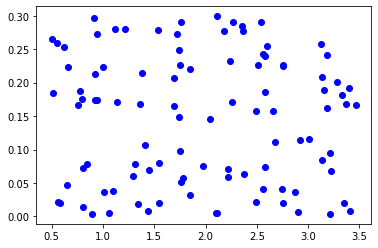

In [3]:
x = model.generate(100)
print(model.parameter_names)

plt.plot(x["theta1"], x["theta2"], "bo")
plt.show()

In [4]:
romc = ROMC(model, discrepancy_name="d", left_lim=np.array([0., 0.]), right_lim =np.array([4., .4, 1.]))

In [5]:
n1 = 40
seed = 21
romc.solve_problems(n1=n1, seed=seed)

### Solving problems ###


 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:45: RuntimeWarning:overflow encountered in multiply
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:47: RuntimeWarning:overflow encountered in multiply
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:50: RuntimeWarning:overflow encountered in multiply
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:50: RuntimeWarning:invalid value encountered in add
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:53: RuntimeWarning:overflow encountered in multiply
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:53: RuntimeWarning:invalid value encountered in add
 /home/givasile/ORwDS/venvs/elfi_dev_env/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning:invalid value encountered in reduce
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:45: RuntimeWarning:invalid value encountered in add
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:47: RuntimeWarning:invalid value encountered in add


 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:43: RuntimeWarning:overflow encountered in multiply
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:50: RuntimeWarning:invalid value encountered in subtract


 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:53: RuntimeWarning:invalid value encountered in subtract
 /home/givasile/ORwDS/elfi/elfi/examples/lorenz.py:47: RuntimeWarning:invalid value encountered in subtract


Time: 79.889 sec███████████████████████████████████████████--| 97.5% Complete


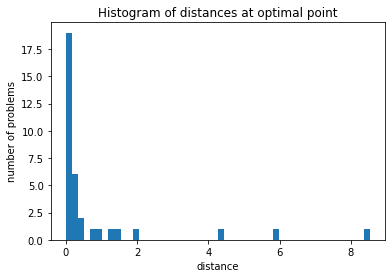

In [6]:
romc.theta_hist()

In [7]:
eps = 1
region_mode = "romc_jacobian"
romc.estimate_regions(eps=eps, region_mode=region_mode)

### Estimating regions ###

Time: 9.367 sec ███████████████████████████████████████████--| 97.5% Complete



In [8]:
romc.eval_unnorm_posterior(np.array([[1.7, 0.1]]))

array([6.67])

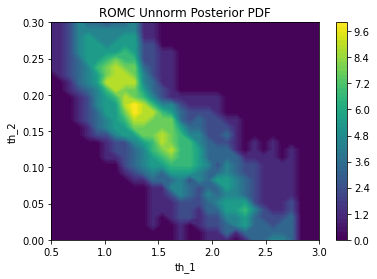

In [9]:
def plot_romc_posterior(posterior, nof_points):
    plt.figure()
    th1 = np.linspace(0.5, 3, nof_points)
    th2 = np.linspace(0, .3, nof_points)
    X, Y = np.meshgrid(th1, th2)

    x_flat = X.flatten()
    y_flat = Y.flatten()
    th = np.stack((x_flat, y_flat), -1)
    z_flat = posterior(th)
    Z = z_flat.reshape(nof_points, nof_points)
    
    plt.contourf(X, Y, Z, 50, cmap='viridis')
    plt.title('ROMC Unnorm Posterior PDF')
    plt.xlabel("th_1")
    plt.ylabel("th_2")
    plt.colorbar()
    plt.show(block=False)
    
plot_romc_posterior(romc.eval_unnorm_posterior, nof_points=30)

In [10]:
n2 = 40
tmp = romc.sample(n2=n2)

### Getting Samples from the posterior ###



Time: 0.999 sec 



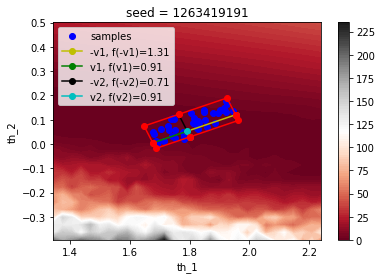

In [11]:
# As before but now it plots the samples as well
romc.visualize_region(7)

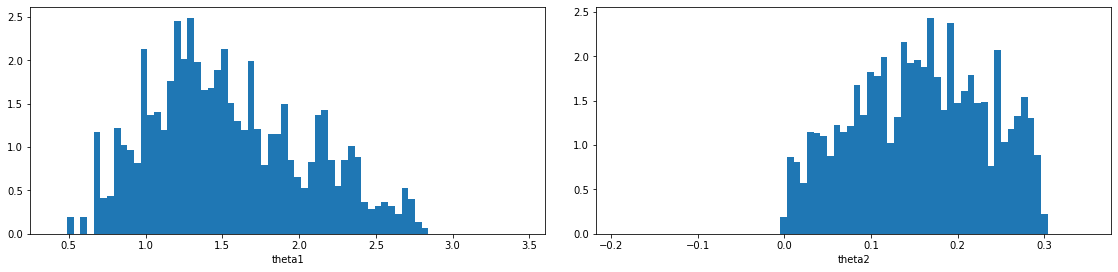

In [12]:
romc.result.plot_marginals(weights=romc.result.weights, bins=70)
plt.show()

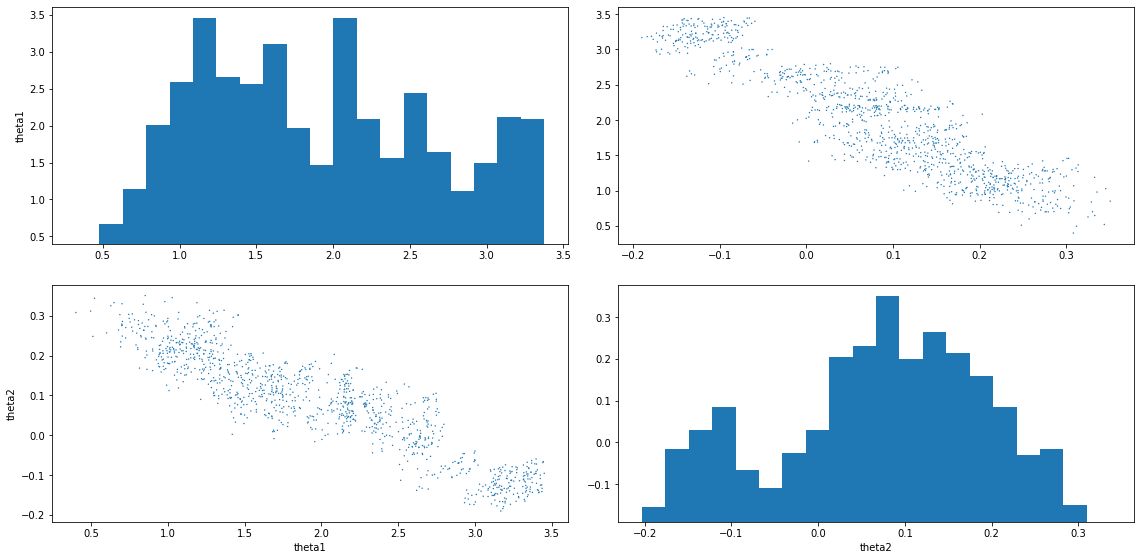

In [13]:
romc.result.plot_pairs()
plt.show()

In [14]:
romc.result.summary()

Method: ROMC
Number of samples: 1160
Sample means: theta1: 1.54, theta2: 0.157
